# Author: Ameni Daalouch 

task 2: Prediction using Unsupervised Machine Learning 

GRIP @The sparks Foundations 

<small> In this task I will predict the percentage of a student based on the number of study hours. </small>

Technical stack : Pandas, NumPy, Matplotlib, scikit learn

In [37]:
# importing all the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets
from sklearn.cluster import KMeans
from itertools import combinations
from sklearn.metrics import silhouette_score

Step 1: Importing the data

In [38]:
#reading the data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names )
iris_df ['species'] = iris.target_names[iris.target]
#show the first 100 columns 
iris_df .head(100)




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [39]:
#check for null values 
print (iris_df.isnull().values.any())

False


In [40]:
# data description
print(iris_df.shape)
iris_df.describe()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
# count the number of species 
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Step 2: Plotting the data

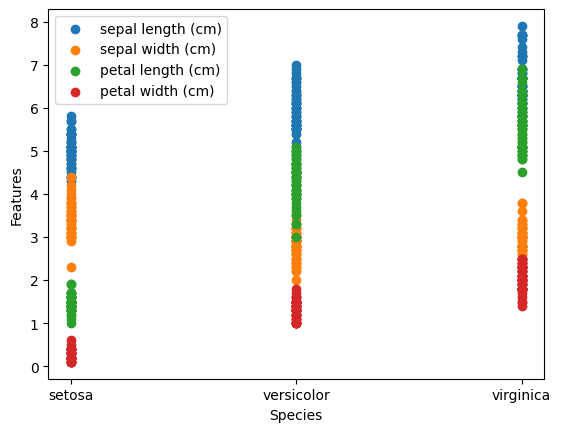

In [42]:
for feature in iris_df.columns[:-1]:
    plt.scatter(iris_df['species'], iris_df[feature], label=feature)
plt.legend()
plt.xlabel('Species')
plt.ylabel('Features')
plt.show()

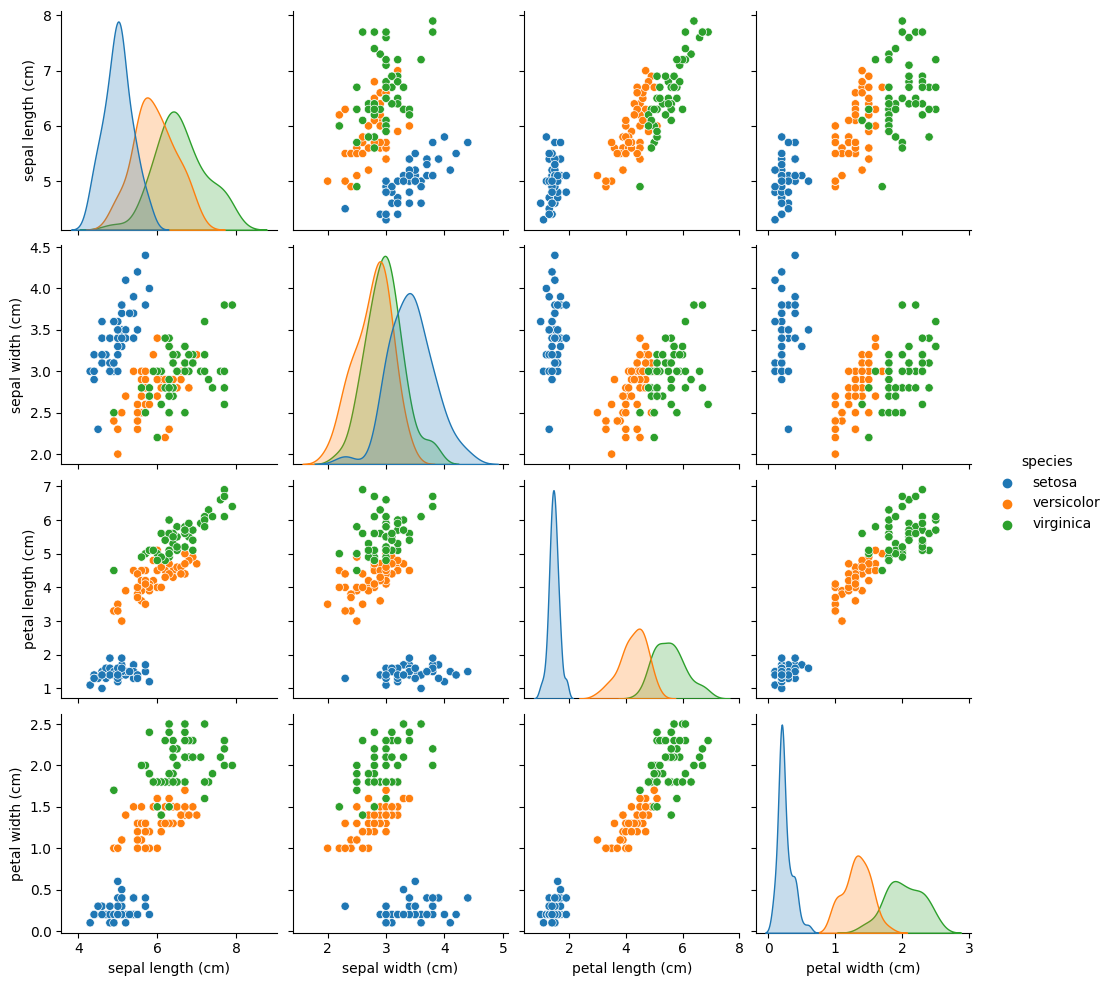

In [43]:
# showing pairwise relationships between the different features
sns.pairplot(iris_df, hue="species")

<small> we can observe from the figures above that Iris-setose is segregated from the other two. we can conclude that Iris-setose is easy to cluster, while it is difficult to distinguish between the other two species. </small>

Step 3: Find the optimum number of clusters for K Means

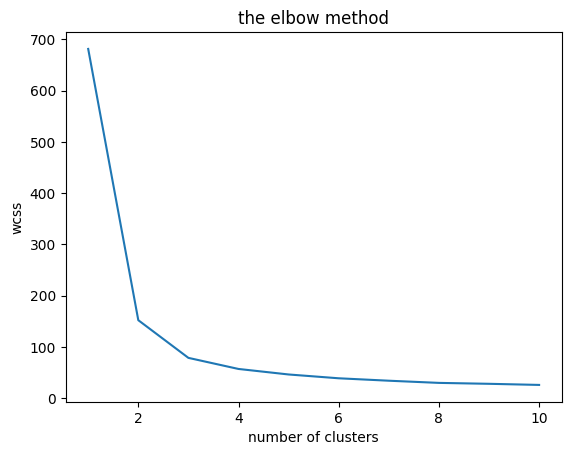

In [44]:
x = iris_df.iloc[:, [0,1,2,3]].values 
wcss = []
for i in range(1, 11) : 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# plotting the result using the elbow method 
plt.plot(range(1,11), wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()


<small> in the elbow method, the optimum clusters is when the elbow occurs. from the figure above, we can observe that the Within-Cluster-Sum-of-Squares (wcss) at the point 3 is no longer decreasing significantly with every iteration. </small>

The number of clusters will be "3"

Step 4: Applying the Kmeans to the dataset

In [45]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(x)

Step 5: Visualazing the clusters 

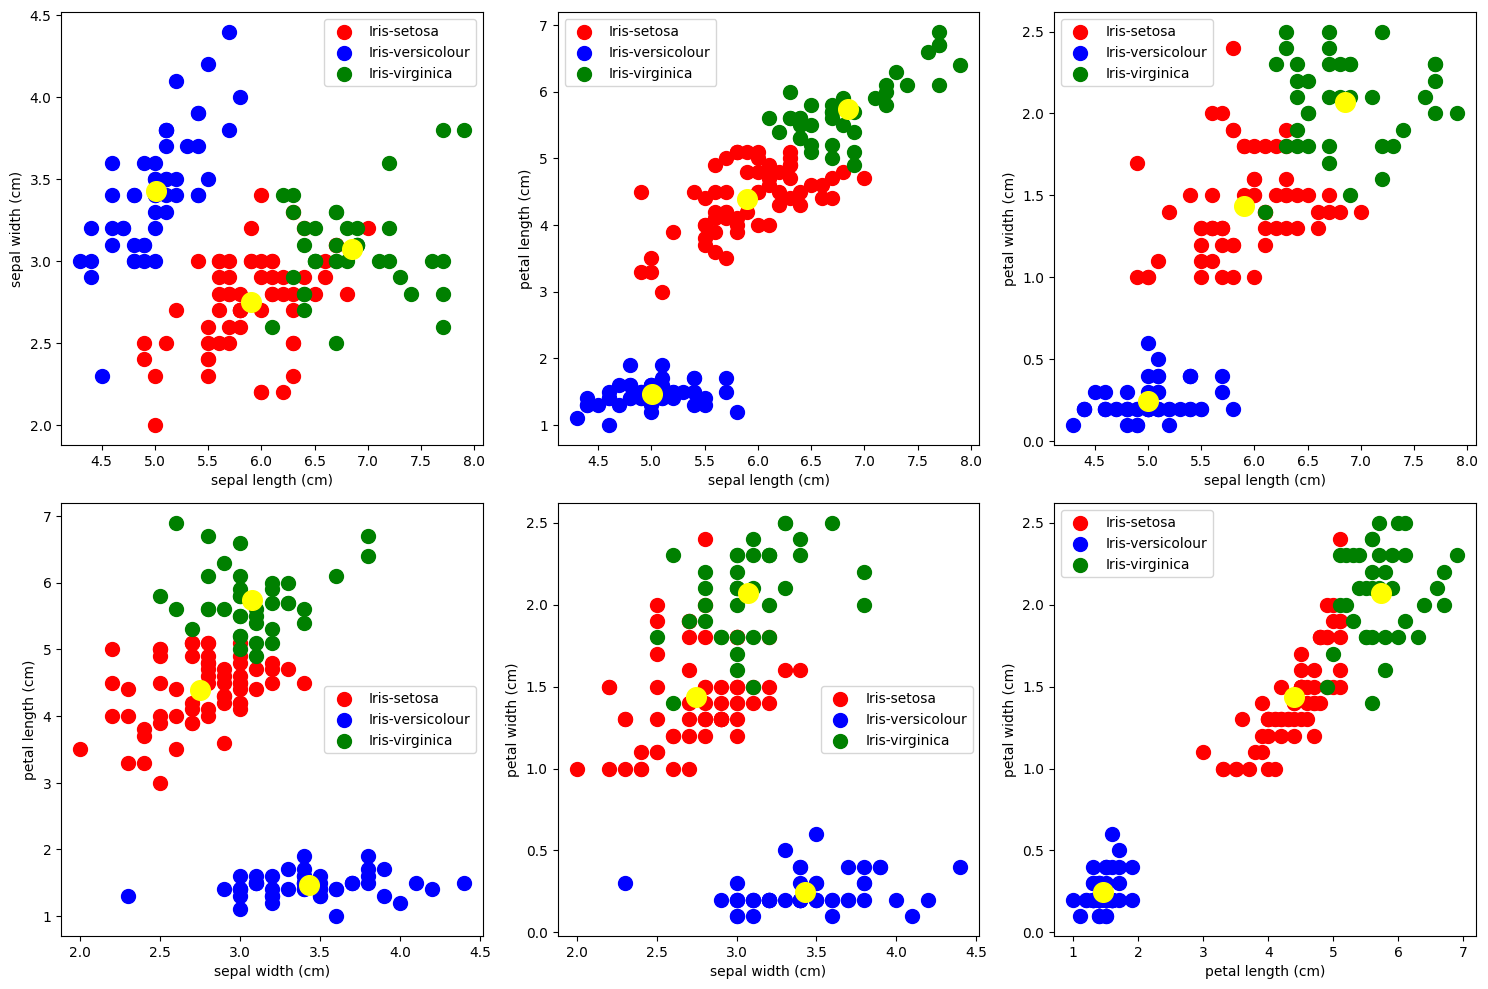

In [47]:
# Create scatterplot for each feature pair
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, pair in enumerate(combinations(range(x.shape[1]), 2)):
    # Scatterplot of each feature pair
    axs[i].scatter(x[y_kmeans == 0, pair[0]], x[y_kmeans == 0, pair[1]], s = 100, c = 'red', label = 'Iris-setosa')
    axs[i].scatter(x[y_kmeans == 1, pair[0]], x[y_kmeans == 1, pair[1]], s = 100, c = 'blue', label = 'Iris-versicolour')
    axs[i].scatter(x[y_kmeans == 2, pair[0]], x[y_kmeans == 2, pair[1]], s = 100, c = 'green', label = 'Iris-virginica')
    
    # Plot the centroids
    centroids = kmeans.cluster_centers_[:, pair]
    axs[i].scatter(centroids[:, 0], centroids[:, 1], s=200, color='yellow', marker='o')
    
    # Add labels and legend
    axs[i].set_xlabel(iris_df.columns[pair[0]])
    axs[i].set_ylabel(iris_df.columns[pair[1]])
    axs[i].legend()

plt.tight_layout()
plt.show()

Step 6: Evaluating the accuracy of the clustering using the  silhouette score

In [48]:
silhouette_score(x, y_kmeans)

0.5528190123564095

From this score, we can conclude that the clusters are reasonably well-separated.